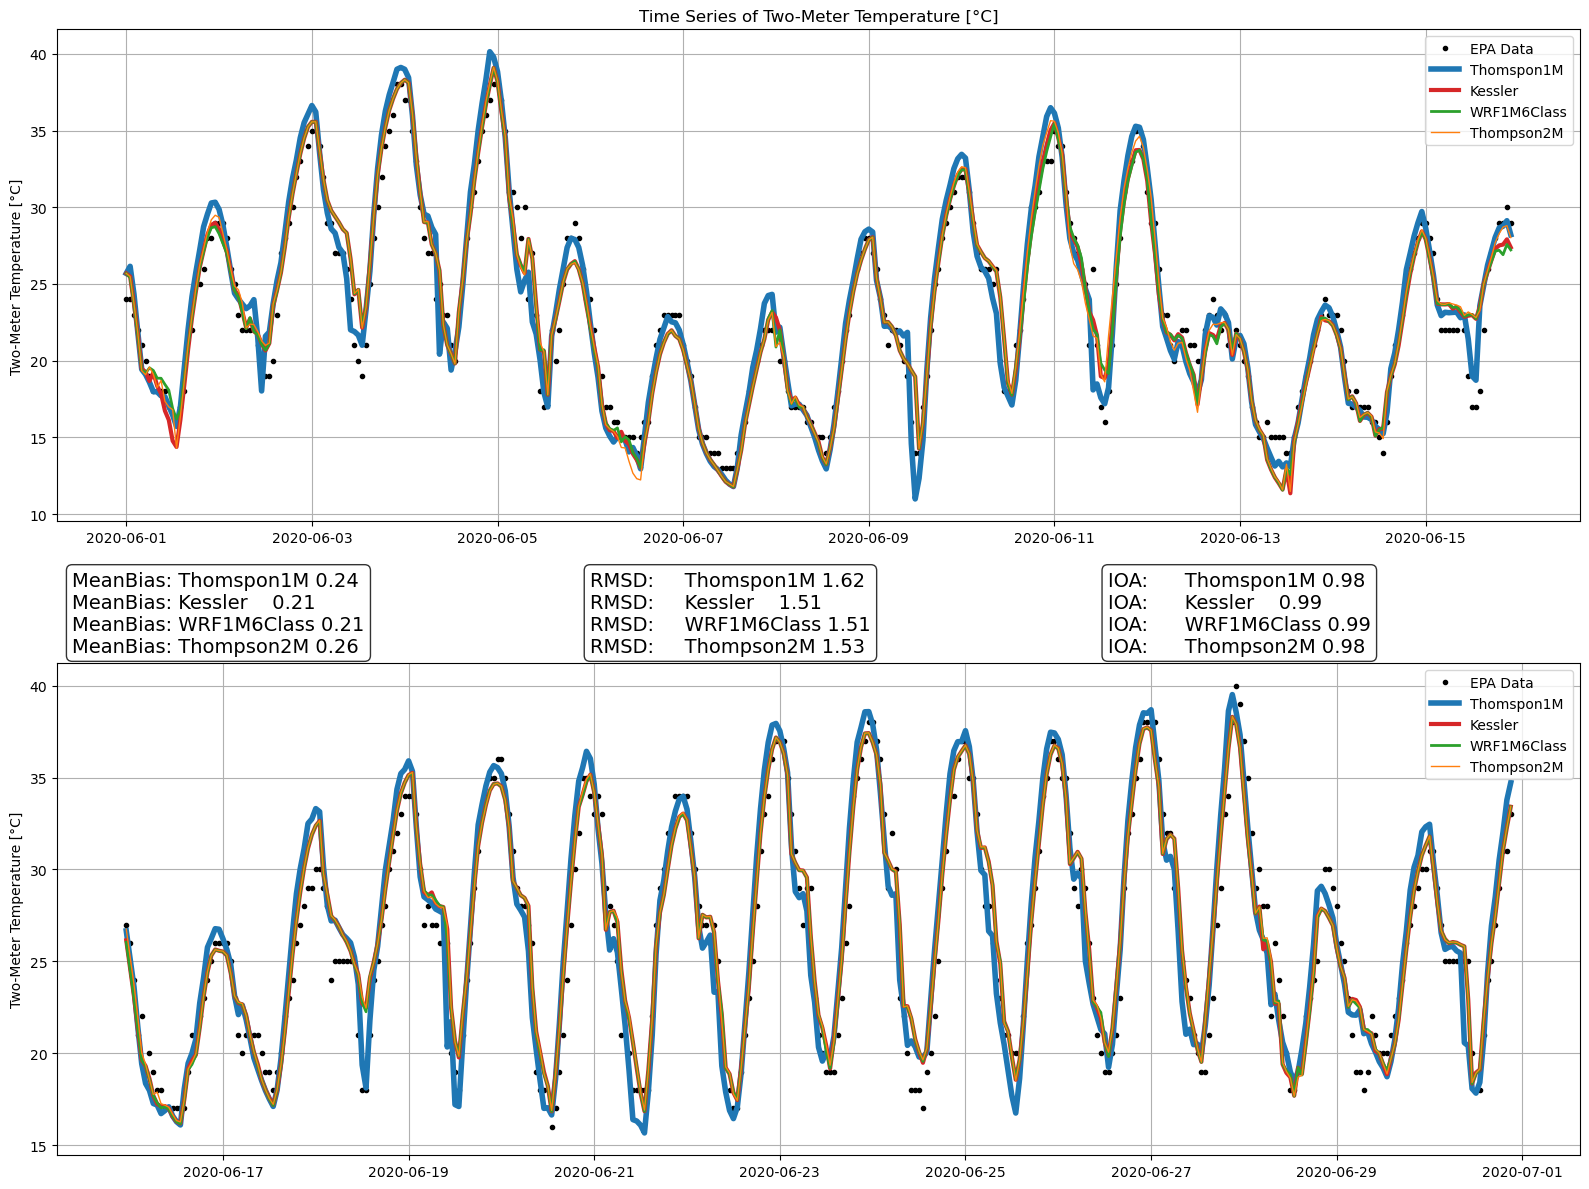

[[np.float64(0.2443538612043354), np.float64(0.20845216563050176), np.float64(0.20580981617242516), np.float64(0.25537302796269806)], [np.float64(1.618829105655619), np.float64(1.505850960238362), np.float64(1.5094748777057372), np.float64(1.5297314758695406)], [np.float64(0.9838995454052295), np.float64(0.9851298331734327), np.float64(0.9850011914296267), np.float64(0.9847522692716489)]]


In [3]:
## Loading the Libaries.
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, ll_to_xy, vertcross, interplevel,ALL_TIMES
import cartopy as cp
from glob import glob
from PyWRFFun import MonthTimeSeries, MonthGlob

# === Inputs ===
Var = "T2"
Title = "Time Series of Two-Meter Temperature [°C]"
YLabel = "Two-Meter Temperature [°C]"
lat_point = 37.689
lon_point = -121.4415
## Load the EPA Data Input File
DataVal = (np.loadtxt("/data/wto/EPAMetData/hourly_TEMP_2020_06_Sac.csv", delimiter=',',usecols=[13])-32)*5/9
#print(len(DataVal))

# === Get monthly WRF Values ===
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_250711/wrfout_d01_2020-06-*",
            "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP2_250716/wrfout_d01_2020-06-*",
            "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP6_250718/wrfout_d01_2020-06-*",
            "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP38_250719/wrfout_d01_2020-06-*"]
Time, Vals = MonthGlob(WRFFiles, Var, lat_point, lon_point, offset=-273.15)
# Concatenate the Data and WRF Values The [] around DataVal is needed to make sure it adds the array into the list.
Vals = [DataVal] + Vals
# === Call MonthTimeSeries plot function ===
results = MonthTimeSeries(Time,Vals,Title,YLabel, ["EPA Data","Thomspon1M","Kessler","WRF1M6Class","Thompson2M"],Show=True)
print(results)

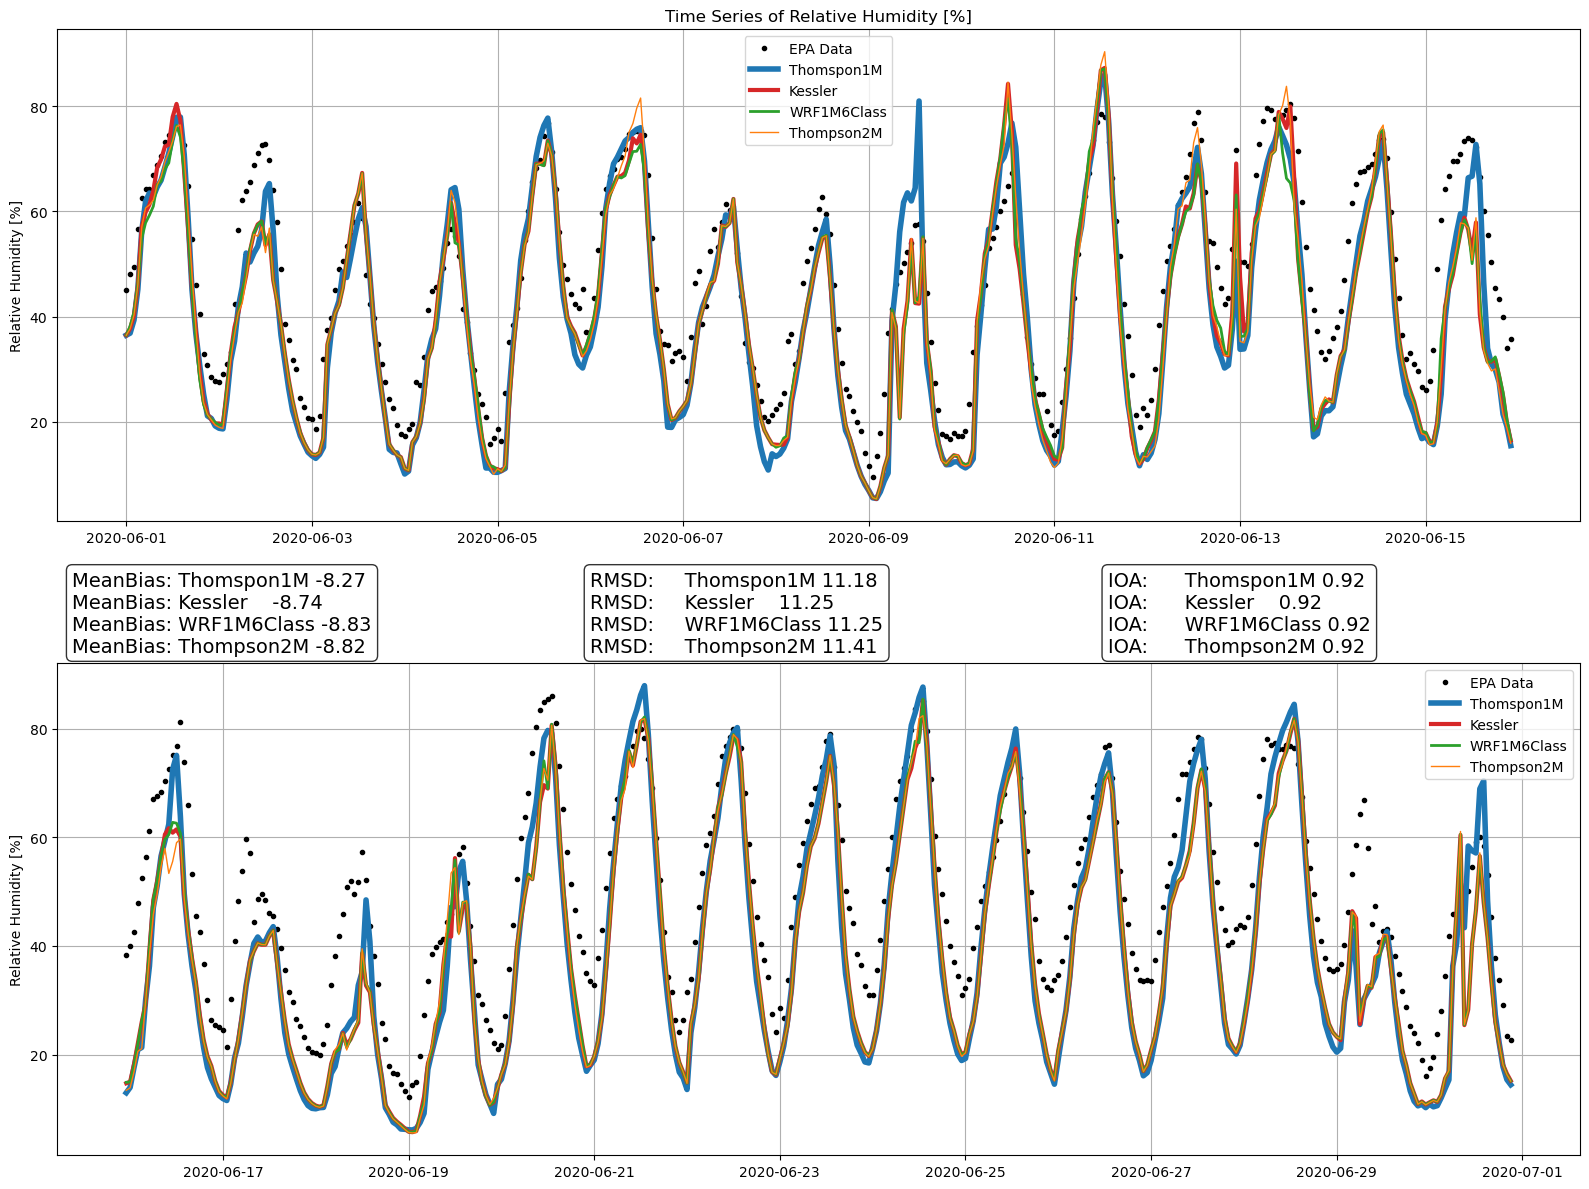

[[np.float64(-8.268562664361387), np.float64(-8.736039446057715), np.float64(-8.825904327647601), np.float64(-8.816168506298226)], [np.float64(11.182753131337925), np.float64(11.245603327326561), np.float64(11.25111190768342), np.float64(11.41168978810054)], [np.float64(0.9232426442835903), np.float64(0.9174606846921203), np.float64(0.9166925464613922), np.float64(0.9158452113964874)]]


In [1]:
## Loading the Libaries.
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, ll_to_xy, vertcross, interplevel,ALL_TIMES
import cartopy as cp
from glob import glob
from PyWRFFun import MonthTimeSeries, MonthGlob

# === Inputs ===
Var = "rh2"
Title = "Time Series of Relative Humidity [%]"
YLabel = "Relative Humidity [%]"
lat_point = 38.56844
lon_point = -121.49311
## Load the EPA Data Input File
DataVal = np.loadtxt("/data/wto/EPAMetData/hourly_RH_DP_2020_06_Sac.csv", delimiter=',',usecols=[13],max_rows=718)
# === Get monthly WRF Values ===
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_250711/wrfout_d01_2020-06-*",
            "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP2_250716/wrfout_d01_2020-06-*",
            "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP6_250718/wrfout_d01_2020-06-*",
            "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_MP38_250719/wrfout_d01_2020-06-*"]
Time, Vals = MonthGlob(WRFFiles, Var, lat_point, lon_point)
# Concatenate the Data and WRF Values The [] around DataVal is needed to make sure it adds the array into the list.
Vals = [DataVal] + Vals
# === Call MonthTimeSeries plot function ===
results = MonthTimeSeries(Time,Vals,Title,YLabel, ["EPA Data","Thomspon1M","Kessler","WRF1M6Class","Thompson2M"],Show=True)
print(results)